In [ ]:
Name - Sourabh Vinod Powade
Prn - 22SC114501053
Roll no - 48
class - Btech AIML A1
Title - Impact of Data Quality on AI Fairness

Fairness Metrics by Gender:

             TPR      FPR       FNR  Selection Rate
Gender                                             
0       0.833333  0.47541  0.166667        0.682759
1       0.962963  0.40000  0.037037        0.875000


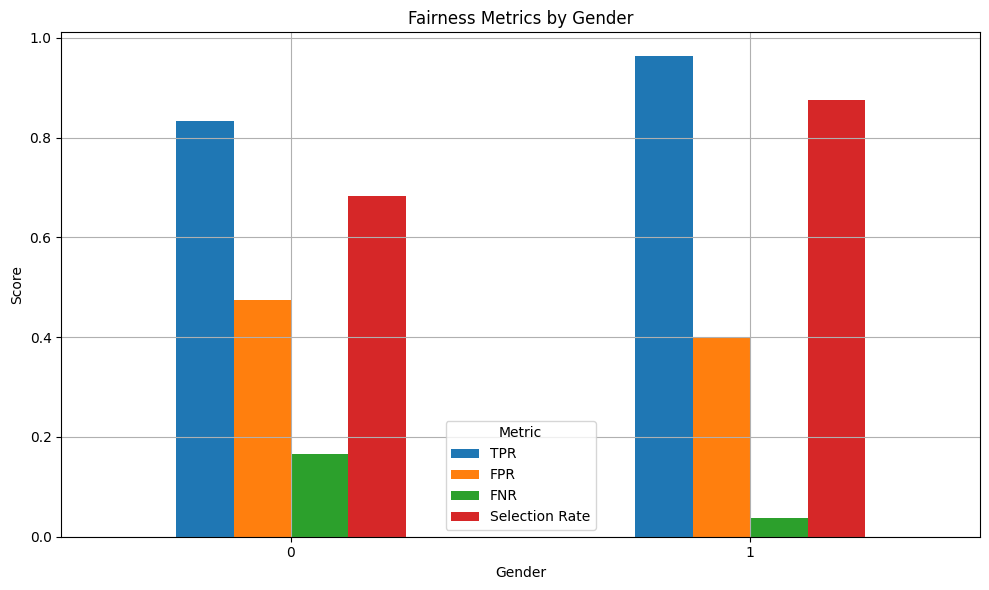

In [ ]:
# Install fairlearn
!pip install fairlearn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from fairlearn.metrics import MetricFrame, selection_rate, true_positive_rate, false_positive_rate, false_negative_rate

# Load dataset
df = pd.read_csv("survey.csv")

# Filter Gender to Male and Female
df = df[df['Gender'].isin(['Male', 'Female'])]

# Drop rows with missing target
df = df.dropna(subset=['treatment'])

# Convert 'treatment' to binary
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})

# Select features
features = ['Age', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company']
df = df.dropna(subset=features)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Prepare features and labels
X = df_encoded
y = df['treatment'].astype(int)
sensitive = df['Gender'].map({'Male': 0, 'Female': 1})

# Split data
X_train, X_test, y_train, y_test, s_train, s_test = train_test_split(
    X, y, sensitive, test_size=0.3, random_state=42, stratify=y
)

# Train fairness-aware model
expgrad_model = ExponentiatedGradient(
    estimator=LogisticRegression(max_iter=1000),
    constraints=DemographicParity(),
    eps=0.01
)
expgrad_model.fit(X_train, y_train, sensitive_features=s_train)
y_pred_fair = expgrad_model.predict(X_test)

# Fairness metrics
metric_frame = MetricFrame(
    metrics={
        'TPR': true_positive_rate,
        'FPR': false_positive_rate,
        'FNR': false_negative_rate,
        'Selection Rate': selection_rate
    },
    y_true=y_test,
    y_pred=y_pred_fair,
    sensitive_features=s_test
)

# Display metrics
print("Fairness Metrics by Gender:\n")
print(metric_frame.by_group)

# Plot fairness metrics
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
metric_frame.by_group.plot(kind='bar', ax=ax)
plt.title('Fairness Metrics by Gender')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.grid(True)
plt.tight_layout()
plt.show()